# 1. Carga de datos
---


In [113]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the path to the file you'd like to load
file_path = "./winequality-red.csv"

# Load the latest version from Kaggle
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    file_path,
)

print("Primeros 5 registros:\n", df.head())

Primeros 5 registros:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5

#### 2. Análisis de características
---

#### Lo primero que haremos será la exploración de características con los datos del dataset en crudo para ver todos los outliers y todo en lo que se podría aplicar feature engineering

#### Exploración de la estructura del dataset

In [114]:
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())




Forma del DataFrame (filas, columnas): (1599, 12)

Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Primeras 10 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4 

### Análisis de características (EDA)
---

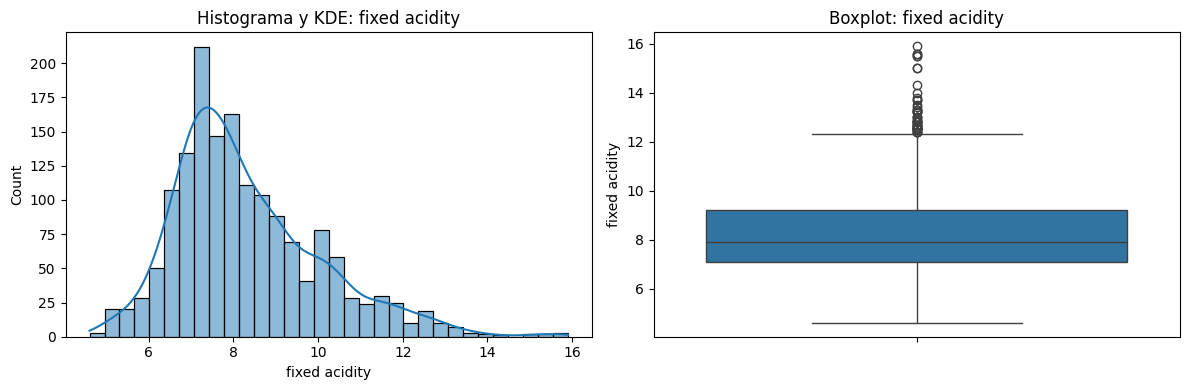

Estadísticos de fixed acidity:
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
Asimetría: 0.983, Curtosis: 1.132



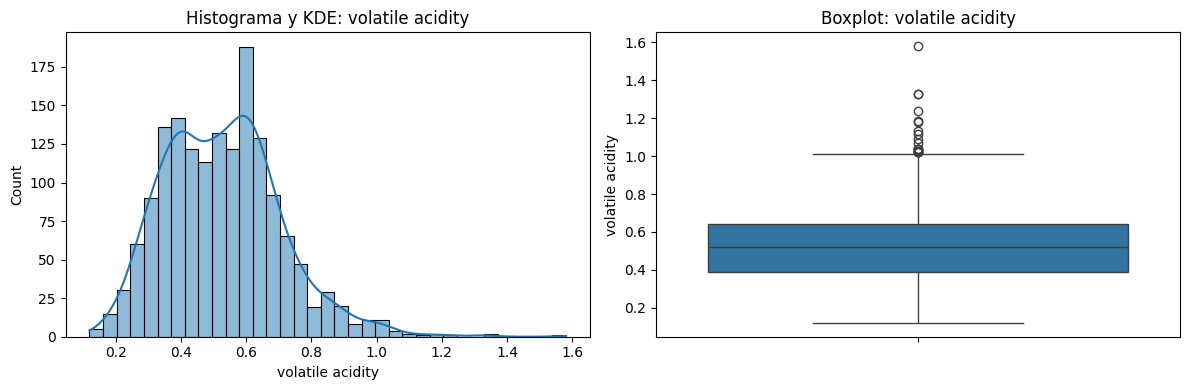

Estadísticos de volatile acidity:
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
Asimetría: 0.672, Curtosis: 1.226



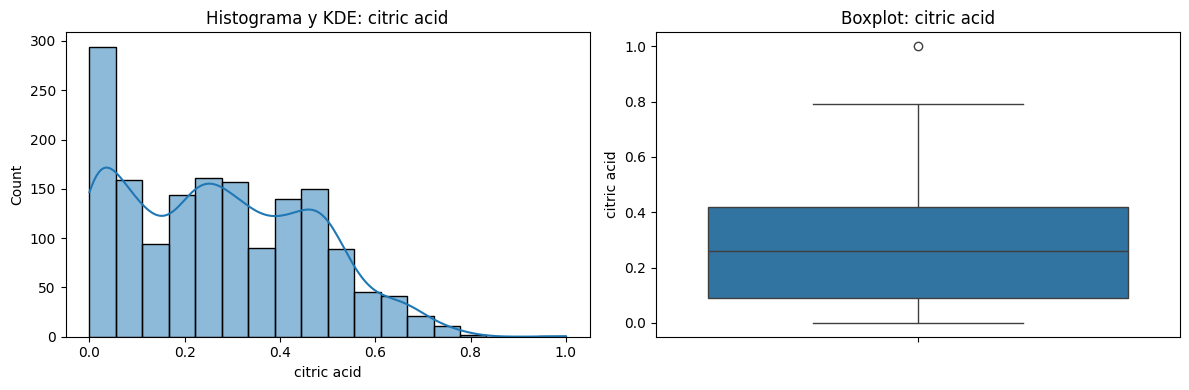

Estadísticos de citric acid:
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
Asimetría: 0.318, Curtosis: -0.789



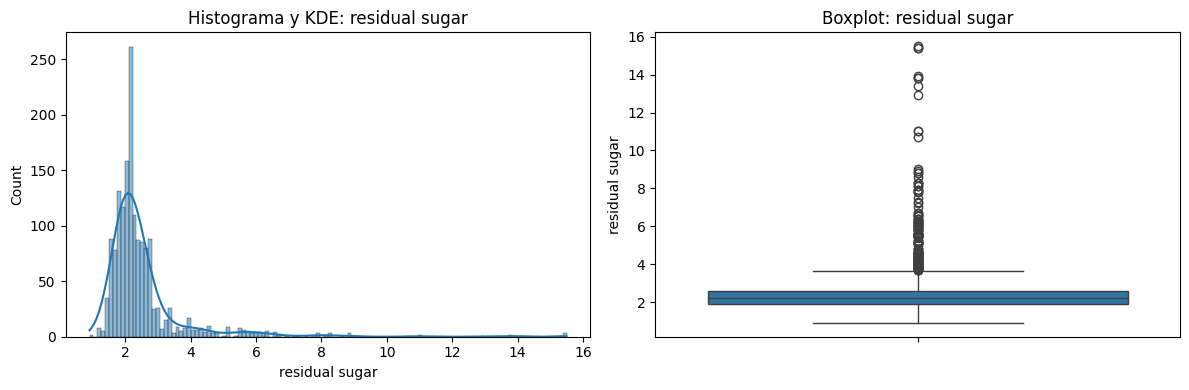

Estadísticos de residual sugar:
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
Asimetría: 4.541, Curtosis: 28.618



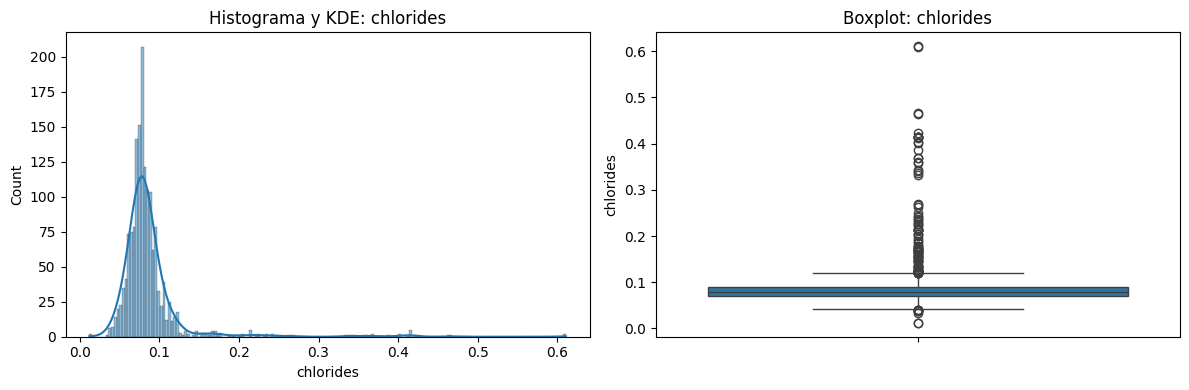

Estadísticos de chlorides:
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
Asimetría: 5.680, Curtosis: 41.716



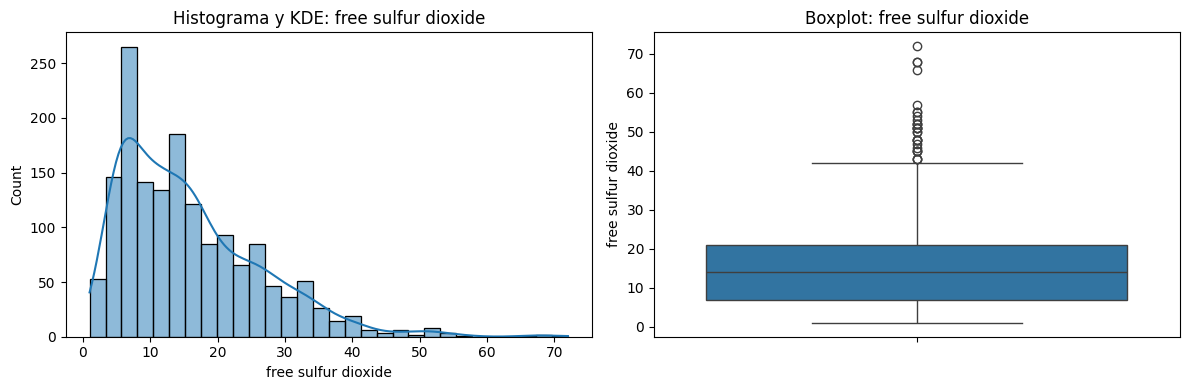

Estadísticos de free sulfur dioxide:
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
Asimetría: 1.251, Curtosis: 2.024



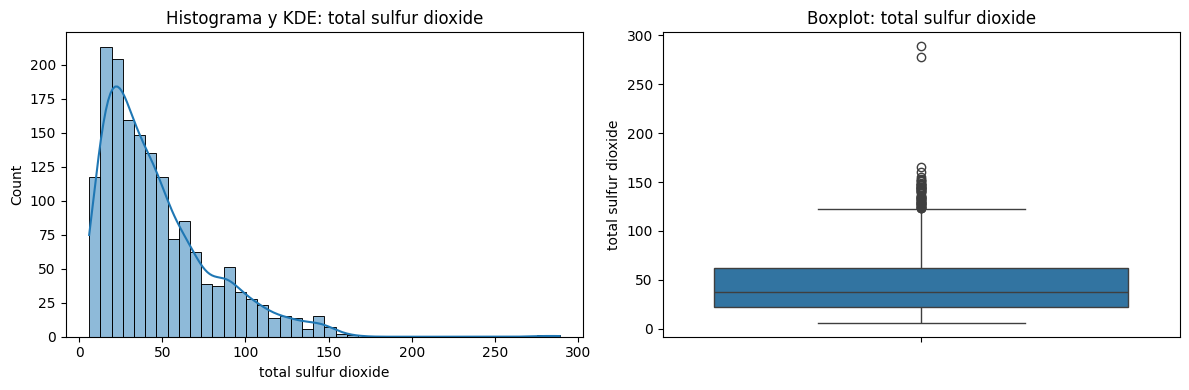

Estadísticos de total sulfur dioxide:
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
Asimetría: 1.516, Curtosis: 3.810



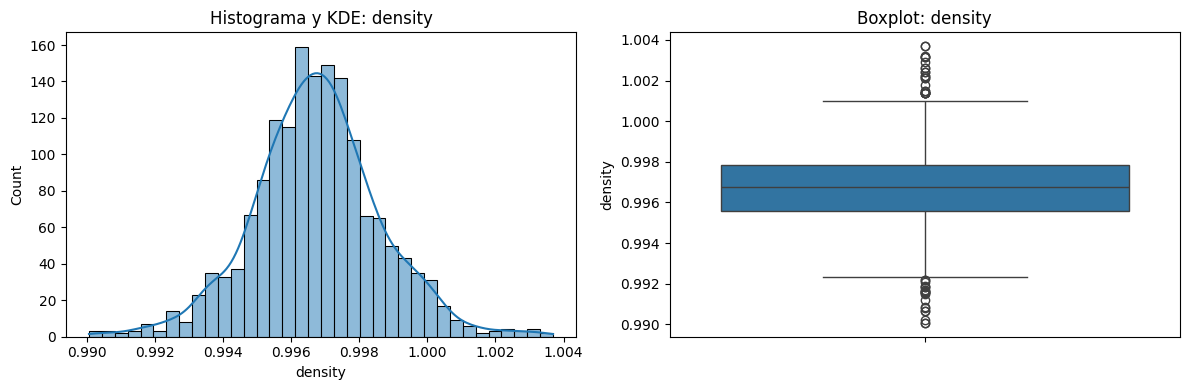

Estadísticos de density:
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
Asimetría: 0.071, Curtosis: 0.934



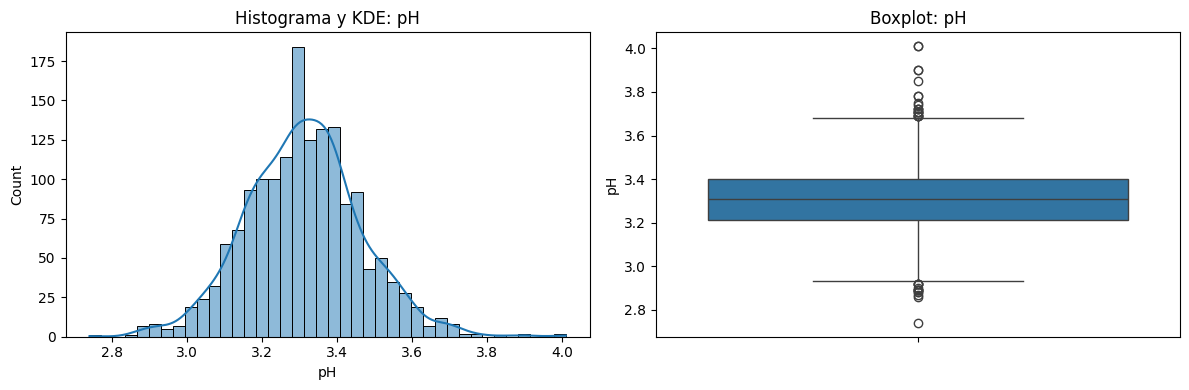

Estadísticos de pH:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
Asimetría: 0.194, Curtosis: 0.807



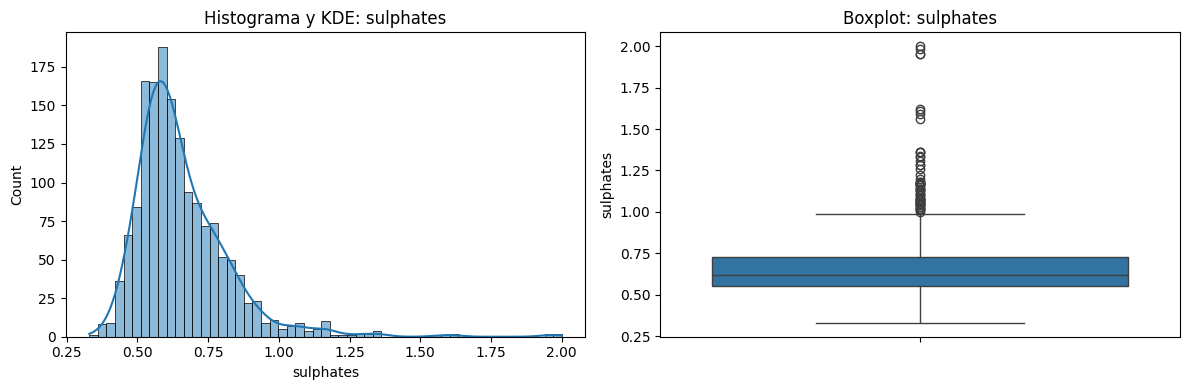

Estadísticos de sulphates:
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
Asimetría: 2.429, Curtosis: 11.720



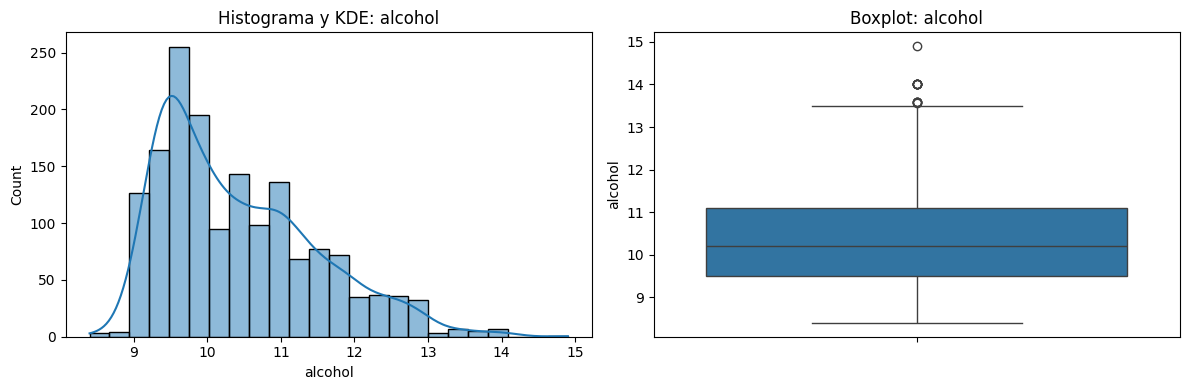

Estadísticos de alcohol:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Asimetría: 0.861, Curtosis: 0.200



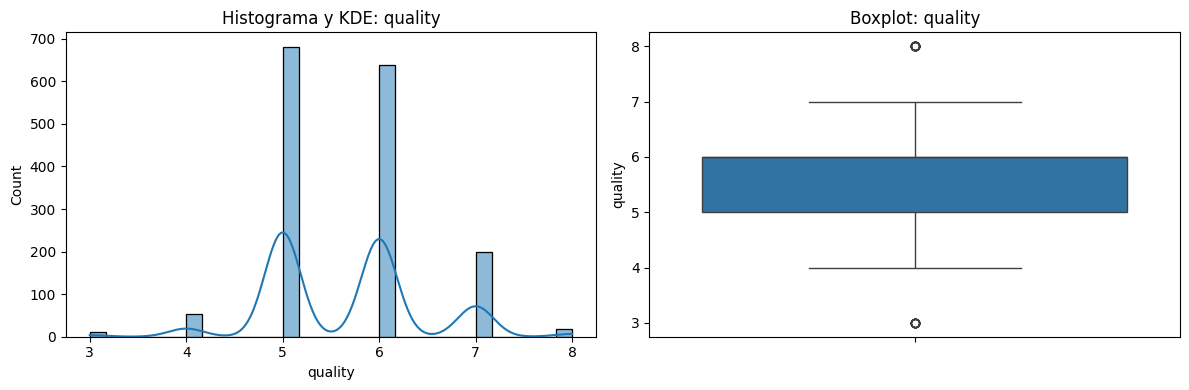

Estadísticos de quality:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
Asimetría: 0.218, Curtosis: 0.297



In [115]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")


# Identificación de outliers usando el criterio de rango intercuartílico (IQR)


### Eliminación de datos duplicados
---
¿Por qué es el primer paso?
Eliminar los datos duplicados al inicio del análisis es importante porque los registros repetidos pueden distorsionar las estadísticas descriptivas, los gráficos y las correlaciones, haciendo que los resultados no reflejen la realidad del fenómeno estudiado. Además, los duplicados pueden causar que el modelo aprenda patrones falsos o sobreentrene, afectando la capacidad de generalización. Por eso, limpiar duplicados antes de explorar y analizar asegura que todo el análisis posterior se base en información verídica y representativa del dataset.

In [116]:
print("Duplicados totales:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print(df[df.duplicated()])
df = df.drop_duplicates()
print("Duplicados totales después de eliminar:", df.duplicated().sum())




Duplicados totales: 240
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

   

#### División del Dataset

Se divide antes de calcular outliers, para no contaminar los samplings separados con información cruzada.

¿Qué se va a hacer?: Se va a generar un nuevo feature para volver binaria la feature de quality, como se hará esto?, se tomará cada valor del dataset y se comparará mayor a 6 o menor que este, si es mayor 1, 0 en caso contrario, esto permitirá usarla como variable de estratificación


In [117]:

df['target'] = (df['quality'] >= 6).astype(int) # Genera columna target binaria para reemplazar quality, 1 si quality >=6, 0 en otro caso

# 2) Barajamos el dataset completo para evitar bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

dftrain, dfval, dftest = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# 4) Estratificar manualmente
for cls, subset in df.groupby('target'):
    n = len(subset)
    idx = np.random.permutation(n)
    
    n_train = int(0.7 * n)
    n_val   = int(0.15 * n)
    n_test  = n - n_train - n_val
    
    train_idx = idx[:n_train]
    val_idx   = idx[n_train:n_train + n_val]
    test_idx  = idx[n_train + n_val:]
    
    dftrain = pd.concat([dftrain, subset.iloc[train_idx]])
    dfval   = pd.concat([dfval,   subset.iloc[val_idx]])
    dftest  = pd.concat([dftest,  subset.iloc[test_idx]])

# 5) Reordenar
dftrain = dftrain.sample(frac=1, random_state=42).reset_index(drop=True)
dfval   = dfval.sample(frac=1, random_state=42).reset_index(drop=True)
dftest  = dftest.sample(frac=1, random_state=42).reset_index(drop=True)

print("Train:", dftrain['target'].value_counts(normalize=True))
print("Val  :", dfval['target'].value_counts(normalize=True))
print("Test :", dftest['target'].value_counts(normalize=True))

Train: target
1    0.528917
0    0.471083
Name: proportion, dtype: float64
Val  : target
1    0.527094
0    0.472906
Name: proportion, dtype: float64
Test : target
1    0.531707
0    0.468293
Name: proportion, dtype: float64


### Verificamos outliers para training
---
¿Porque solo para training?

Si se utiliza con el data frame completo existe lo que se conoce como data leakeage, estariamos mezclando valores de samplings que deberían separarse, 
se utiliza el método de IQR (rangos intercuartílicos para hacer una detección de outliers) 

In [118]:
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = dftrain[col].quantile(0.25)
    Q3 = dftrain[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dftrain[(dftrain[col] < lower) | (dftrain[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")


=== Detección de outliers (criterio 1.5*IQR) ===
fixed acidity: 19 outliers
volatile acidity: 15 outliers
citric acid: 0 outliers
residual sugar: 85 outliers
chlorides: 72 outliers
free sulfur dioxide: 22 outliers
total sulfur dioxide: 28 outliers
density: 23 outliers
pH: 23 outliers
sulphates: 40 outliers
alcohol: 7 outliers
quality: 19 outliers


#### Tratamiento de outliers
---

#### Se necesita tratar los outliers antes de ver la correlación para poder elegir certeramente cuales características serán más valiosas para realizar la regresión 

Por lo tanto para tratarlos se procederá con los siguientes métodos, a elegir según sea conveniente 
 - Regla de rangos intercuartílicos
 - Winzorización 
 - z score
  

Analisis de la decisión de método de limpieza de outliers para cada respectivo feature:
 

 Porque usar winsorización en : 'residual sugar', 'chlorides', 'sulphates' y 'total sulfur dioxide', esto debido a que en el analisis posee largas colas, esto que quiere decir, que muchos datos se encuentran en sus extremos, lo que al realizar un proceso como intercuartílicos, produciría que se perdieran muchos datos, y no es lo ideal, ya que es información valiosa para el modelo

 Porque usar IQR para 'fixed acidity', 'volatile acidity', 'pH', 'alcohol', son muy normales, estas los valores atípicos son muy escasos por lo que pueden ser eliminados los que se salen del rango IQR sin que afecten demasiado al modelo 

 Z score se usa para 'density' y para 'free sulfur dioxide' porque son normales con colas muy cortas

Target no se trata, quality tampoco, 

 

In [119]:
# === Calcular límites por variable en TRAIN ===
def calcular_limites(df):
    limites = {}

    # IQR para algunas columnas
    for col in ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limites[col] = ('iqr', Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    # Z-score para density
    for col in ['density', 'free sulfur dioxide']:
        mu = df[col].mean()
        std = df[col].std()
        limites[col] = ('zscore', mu - 3*std, mu + 3*std)

    # Winsorización para colas pesadas
    for col in ['residual sugar', 'chlorides', 'sulphates', 'total sulfur dioxide']:
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        limites[col] = ('winsor', low, high)

    return limites

def aplicar_limites(df, limites):
    df2 = df.copy()
    reporte = []

    for col, (tipo, low, high) in limites.items():
        n_before = len(df2)

        if tipo in ('iqr', 'zscore'):
            # Eliminar filas fuera de sus rangos
            mask = (df2[col] >= low) & (df2[col] <= high)
            df2 = df2[mask]
            n_afectados = n_before - len(df2)  # filas eliminadas

        elif tipo == 'winsor':
            # Recortar valores (sin eliminar filas)
            original = df2[col].copy()
            df2[col] = df2[col].clip(lower=low, upper=high)
            n_afectados = int((df2[col] != original).sum())  # valores modificados

        else:
            raise ValueError(f"Tipo de límite desconocido para {col}: {tipo}")

        reporte.append({
            'col': col,
            'tipo': tipo,
            'lim_inf': float(low),
            'lim_sup': float(high),
            'valores_afectados': int(n_afectados),
            'pct_afectados_sobre_estado_actual': (100 * n_afectados / n_before) if n_before else 0.0,
            'filas_restantes': int(len(df2))
        })

    # resetear índices al final para dejar limpio
    df2 = df2.reset_index(drop=True)
    return df2, pd.DataFrame(reporte)

#### Se limpian cada sample que se utilizará
---


In [120]:
# Calcular límites solo con train
limites = calcular_limites(dftrain)

#Los datasets limpios serán dftrain_clean, dfval_clean, dftest_clean
# Aplicar límites a cada conjunto
dftrain_clean, rep_train = aplicar_limites(dftrain, limites)
dfval_clean,   rep_val   = aplicar_limites(dfval,   limites)
dftest_clean,  rep_test  = aplicar_limites(dftest,  limites)

print("Reporte TRAIN")
print(rep_train)
print("Reporte VAL")
print(rep_val)
print("Reporte TEST")
print(rep_test)

Reporte TRAIN
                    col    tipo    lim_inf     lim_sup  valores_afectados  \
0         fixed acidity     iqr   3.800000   12.600000                 19   
1      volatile acidity     iqr   0.015000    1.015000                 15   
2                    pH     iqr   2.925000    3.685000                 20   
3               alcohol     iqr   7.100000   13.500000                  3   
4               density  zscore   0.991096    1.002354                  4   
5   free sulfur dioxide  zscore -16.191013   48.318247                 13   
6        residual sugar  winsor   1.400000    8.450000                 11   
7             chlorides  winsor   0.042500    0.364000                 16   
8             sulphates  winsor   0.430000    1.270000                 14   
9  total sulfur dioxide  winsor   8.000000  147.000000                 12   

   pct_afectados_sobre_estado_actual  filas_restantes  
0                           1.997897              932  
1                         

#### Se normaliza el dataset 
      Con el objetivo de eliminar hacer nuestro modelo más eficiente y limpio
---

### Normalización

In [121]:
# Normalización de los datos numéricos con Z-score
df_norm = df.copy()
num_cols = df_norm.select_dtypes(include=[np.number]).columns

for col in num_cols:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

print("---Columnas originales---\n", df.head())
print("\n---Columnas normalizadas---\n", df_norm.head())


# Seleccionar solo columnas numéricas para normalizar (excluyendo 'quality' y 'target')
num_cols = [c for c in dftrain_clean.select_dtypes(include=[np.number]).columns 
            if c not in ['quality','target']]

# Calcular media y std SOLO en TRAIN
mean = dftrain_clean[num_cols].mean()
std = dftrain_clean[num_cols].std(ddof=0)

# Se normaliza para train, val y test
dftrain_scaled = dftrain_clean.copy()
dfval_scaled   = dfval_clean.copy()
dftest_scaled  = dftest_clean.copy()

dftrain_scaled[num_cols] = (dftrain_clean[num_cols] - mean) / std
dfval_scaled[num_cols]   = (dfval_clean[num_cols]   - mean) / std
dftest_scaled[num_cols]  = (dftest_clean[num_cols]  - mean) / std

---Columnas originales---
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7             0.620         0.04             3.8      0.084   
1            8.2             0.635         0.10             2.1      0.073   
2            8.4             0.370         0.43             2.3      0.063   
3            9.9             0.490         0.58             3.5      0.094   
4            6.3             1.020         0.00             2.0      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                  45.0  0.99780  3.34       0.53   
1                 25.0                  60.0  0.99638  3.29       0.75   
2                 12.0                  19.0  0.99550  3.17       0.81   
3                  9.0                  43.0  1.00040  3.29       0.58   
4                 17.0                  24.0  0.99437  3.59       0.55   

   alcohol  quality  target  
0      9.5        5       0  

Se imprime la matriz de correlación con el dataframe limpio

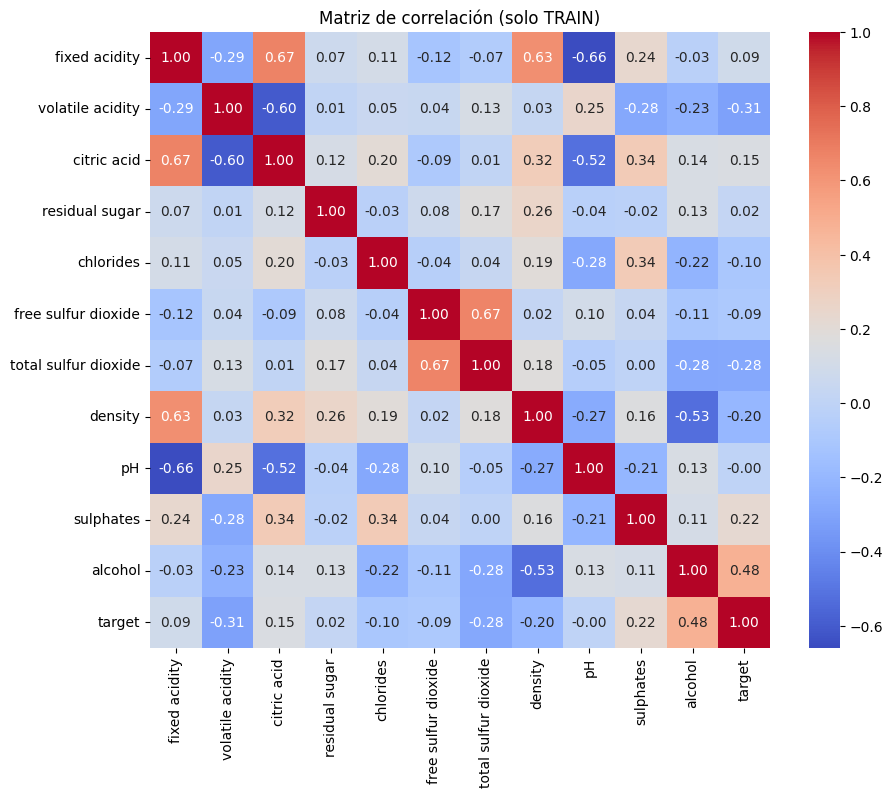

In [122]:
# Excluimos 'quality' y 'target' para no mezclar
features = [c for c in dftrain_scaled.columns if c not in ['quality','target']]

corr = dftrain_scaled[features + ['target']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (solo TRAIN)")
plt.show()

#### Analisis y selección de mejores features para la regresión
---
##### ¿Por qué se hace esta justificación matemática de features?

Seleccionar las mejores variables es clave para que el modelo sea eficiente y evite problemas como la multicolinealidad. Por eso, se usan varias métricas: correlación de Pearson (relación lineal con el target), información mutua (relación no lineal), importancia de los coeficientes en regresión logística L1 (qué tanto pesa cada variable) y el VIF (para evitar variables redundantes). Así, elegimos las features más relevantes y menos redundantes para el modelo.

In [123]:
# Justificación matemática de la selección de features

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Usamos los datos normalizados que ya tienes preparados
X = dftrain_scaled.drop(columns=["target"])
y = dftrain_scaled["target"]

# 1. Correlación Pearson con target
pearson_corr = X.apply(lambda col: col.corr(y))

# 2. Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns)

# 3. Coeficientes de regresión logística con L1
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_l1.fit(X, y)
coef_abs = pd.Series(np.abs(lr_l1.coef_[0]), index=X.columns)

# 4. VIF para multicolinealidad
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.set_index("feature")["VIF"]

# 5. Consolidar resultados en una tabla
results = pd.DataFrame({
    "Pearson_corr": pearson_corr,
    "Mutual_Info": mi_series,
    "L1_abs_coef": coef_abs,
    "VIF": vif_data
})

# 6. Ordenar por combinación de métricas
results["score"] = (
    results["Pearson_corr"].abs() +
    results["Mutual_Info"].rank(pct=True) +
    results["L1_abs_coef"].rank(pct=True) -
    results["VIF"].rank(pct=True) * 0.2  # penalización suave por multicolinealidad
)

results_sorted = results.sort_values("score", ascending=False)

# Mostrar tabla final
print("=== Resultados de justificación matemática de features ===")
display(results_sorted.round(3))

# Sugerencia de las 6 mejores features
top_features = results_sorted.head(6).index.tolist()
print("\nTop 6 features sugeridas:", top_features)

=== Resultados de justificación matemática de features ===


,Pearson_corr,Mutual_Info,L1_abs_coef,VIF,score
quality,0.852,0.692,7.706,1.007,2.835
alcohol,0.476,0.122,0.416,3.367,2.143
volatile acidity,-0.311,0.053,0.143,1.970,1.728
sulphates,0.223,0.057,0.091,1.421,1.690
total sulfur dioxide,-0.280,0.048,0.143,2.317,1.664
citric acid,0.149,0.032,0.000,3.324,0.916
chlorides,-0.105,0.029,0.000,1.466,0.888
density,-0.202,0.014,0.000,6.194,0.769
free sulfur dioxide,-0.095,0.001,0.000,1.990,0.578
fixed acidity,0.091,0.010,0.000,7.271,0.558



Top 6 features sugeridas: ['quality', 'alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'citric acid']


Al aplicar Correlación de Pearson, Información Mutua, Importancia de los coeficientes L1 y Factor de Inflación de la Varianza, se pueden definir como los mejores features para el modelo ['quality', 'alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'citric acid']

## Análisis de características(EDA) con los datos normalizados
---

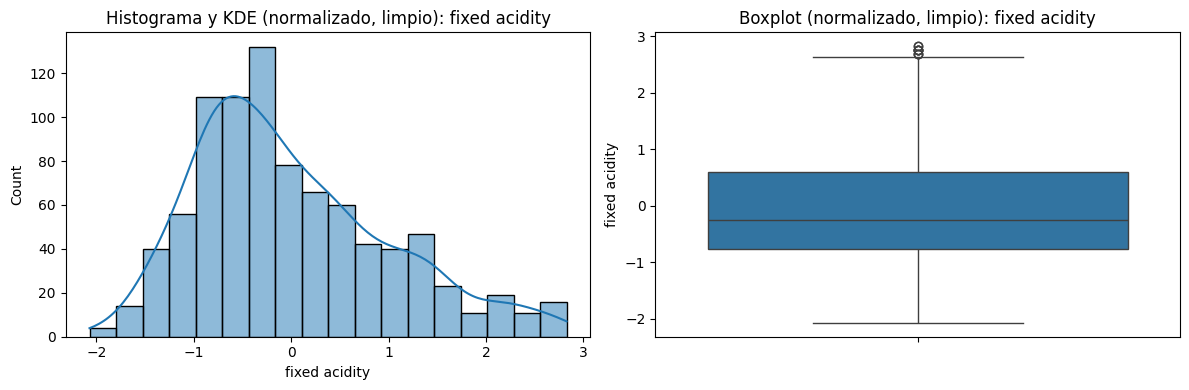

Estadísticos normalizados y limpios de fixed acidity:
count    8.770000e+02
mean    -2.390081e-16
std      1.000571e+00
min     -2.070949e+00
25%     -7.645961e-01
50%     -2.420551e-01
75%      6.070741e-01
max      2.827873e+00
Name: fixed acidity, dtype: float64
Asimetría: 0.715, Curtosis: -0.010



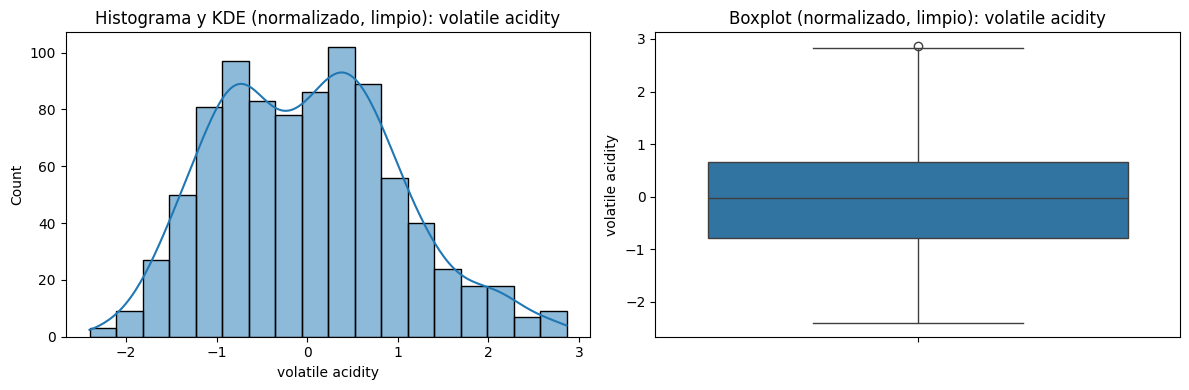

Estadísticos normalizados y limpios de volatile acidity:
count    8.770000e+02
mean     1.569757e-16
std      1.000571e+00
min     -2.401481e+00
25%     -7.955654e-01
50%     -2.234677e-02
75%      6.616543e-01
max      2.862353e+00
Name: volatile acidity, dtype: float64
Asimetría: 0.314, Curtosis: -0.326



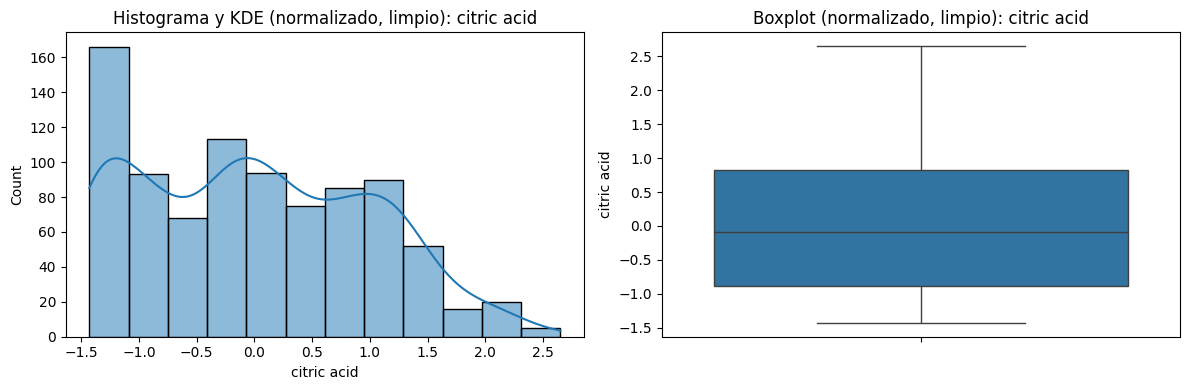

Estadísticos normalizados y limpios de citric acid:
count    8.770000e+02
mean    -1.701414e-16
std      1.000571e+00
min     -1.429845e+00
25%     -8.929259e-01
50%     -8.754775e-02
75%      8.252141e-01
max      2.650738e+00
Name: citric acid, dtype: float64
Asimetría: 0.249, Curtosis: -0.917



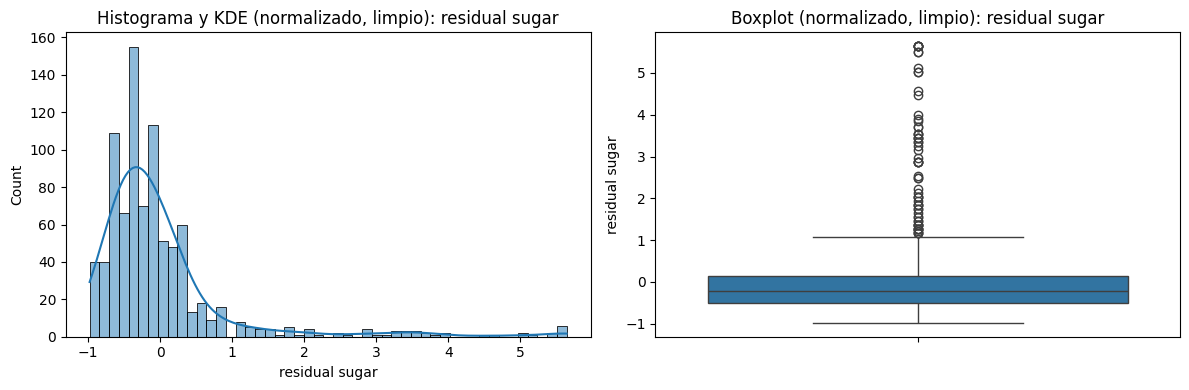

Estadísticos normalizados y limpios de residual sugar:
count    8.770000e+02
mean    -2.066002e-16
std      1.000571e+00
min     -9.791728e-01
25%     -5.096624e-01
50%     -2.279561e-01
75%      1.476522e-01
max      5.640924e+00
Name: residual sugar, dtype: float64
Asimetría: 3.287, Curtosis: 12.956



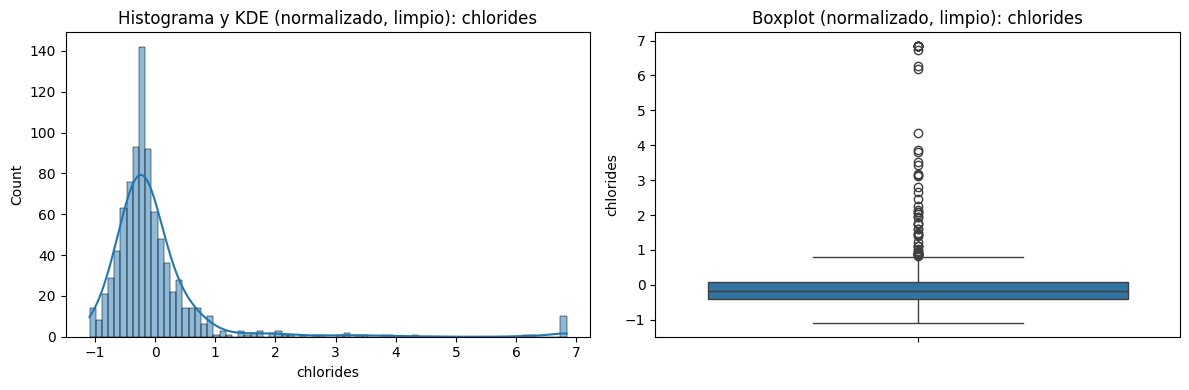

Estadísticos normalizados y limpios de chlorides:
count    8.770000e+02
mean     1.569757e-16
std      1.000571e+00
min     -1.088534e+00
25%     -4.104322e-01
50%     -1.885078e-01
75%      8.273311e-02
max      6.839097e+00
Name: chlorides, dtype: float64
Asimetría: 4.740, Curtosis: 27.435



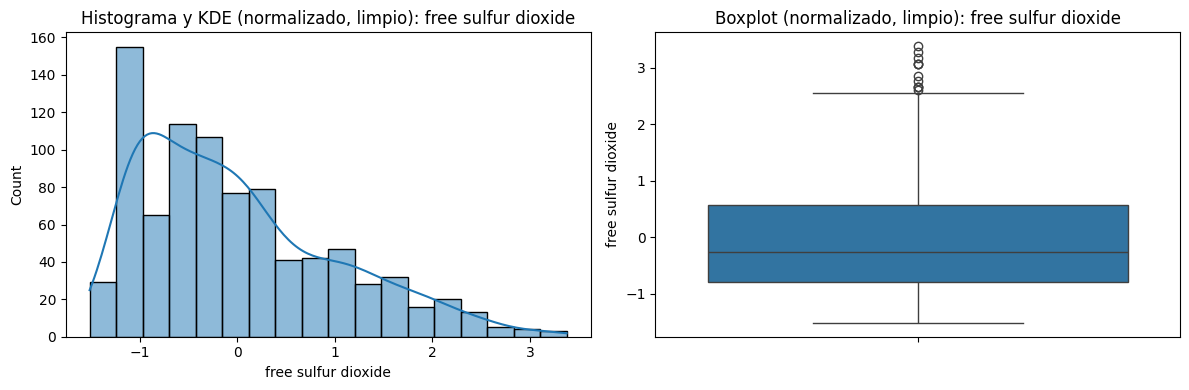

Estadísticos normalizados y limpios de free sulfur dioxide:
count    8.770000e+02
mean    -8.304519e-17
std      1.000571e+00
min     -1.512467e+00
25%     -7.842003e-01
50%     -2.640099e-01
75%      5.682946e-01
max      3.377322e+00
Name: free sulfur dioxide, dtype: float64
Asimetría: 0.875, Curtosis: 0.099



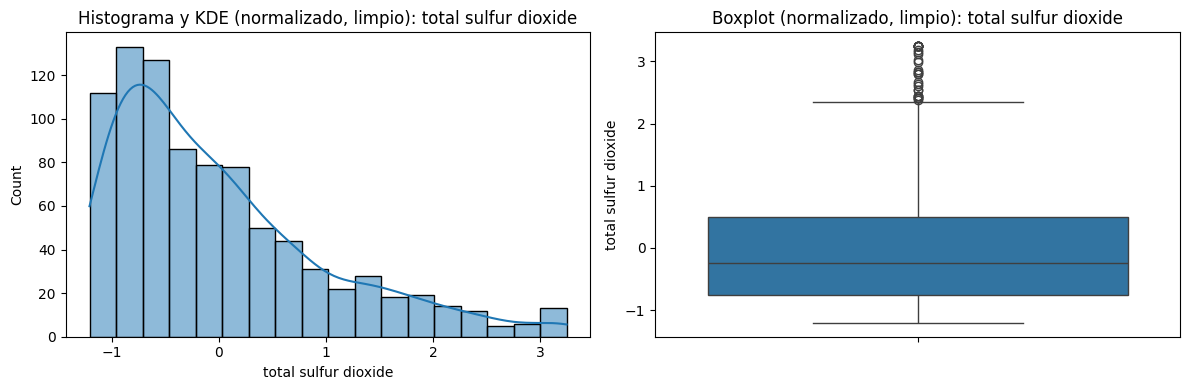

Estadísticos normalizados y limpios de total sulfur dioxide:
count    8.770000e+02
mean    -6.481576e-17
std      1.000571e+00
min     -1.207405e+00
25%     -7.588024e-01
50%     -2.461139e-01
75%      4.908758e-01
max      3.246576e+00
Name: total sulfur dioxide, dtype: float64
Asimetría: 1.184, Curtosis: 0.936



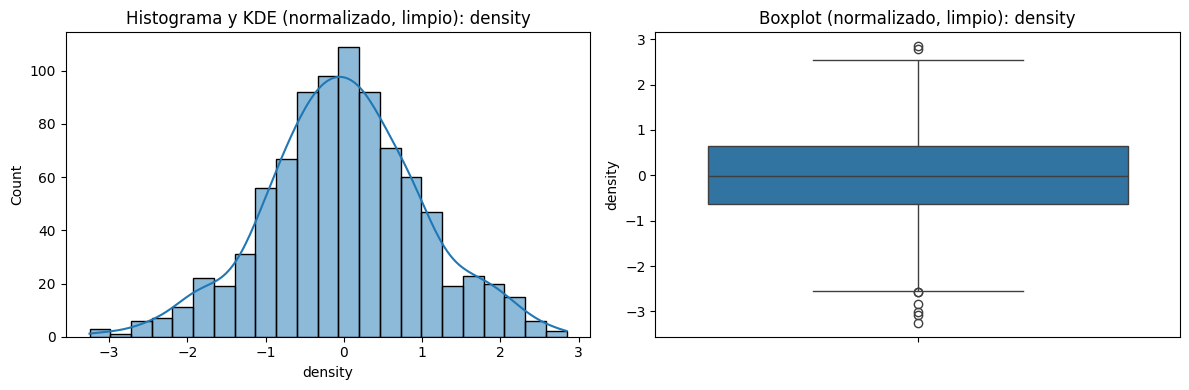

Estadísticos normalizados y limpios de density:
count    8.770000e+02
mean    -2.990032e-14
std      1.000571e+00
min     -3.251859e+00
25%     -6.236707e-01
50%     -8.058947e-03
75%      6.549075e-01
max      2.845065e+00
Name: density, dtype: float64
Asimetría: -0.027, Curtosis: 0.204



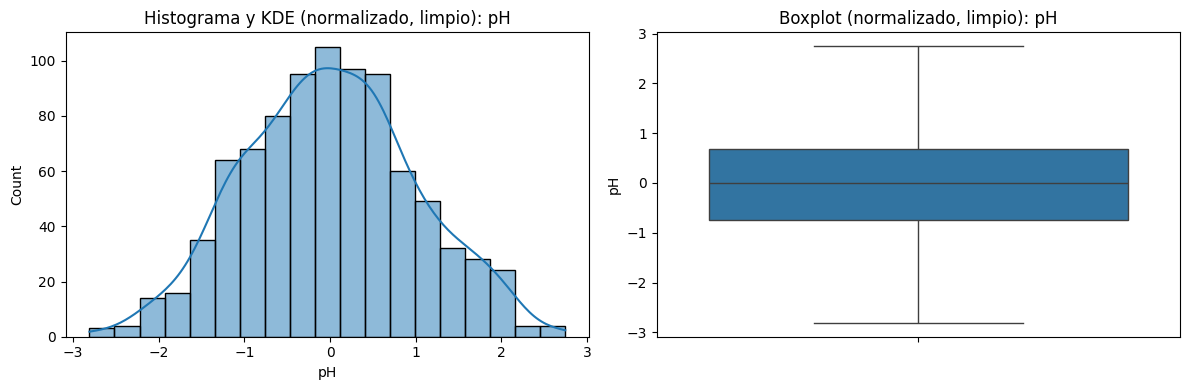

Estadísticos normalizados y limpios de pH:
count    8.770000e+02
mean    -2.359699e-15
std      1.000571e+00
min     -2.810461e+00
25%     -7.361094e-01
50%      4.730563e-03
75%      6.714866e-01
max      2.745839e+00
Name: pH, dtype: float64
Asimetría: 0.069, Curtosis: -0.305



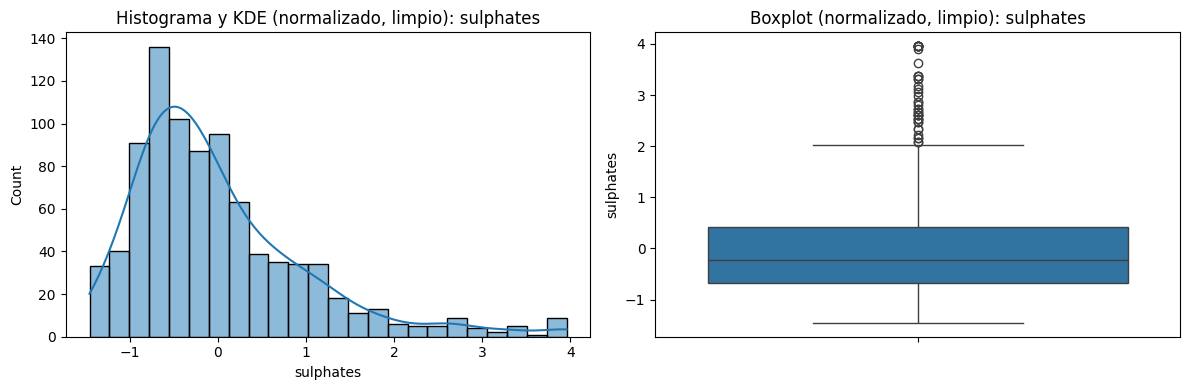

Estadísticos normalizados y limpios de sulphates:
count    8.770000e+02
mean     3.767416e-16
std      1.000571e+00
min     -1.457297e+00
25%     -6.840104e-01
50%     -2.329265e-01
75%      4.114790e-01
max      3.955710e+00
Name: sulphates, dtype: float64
Asimetría: 1.493, Curtosis: 2.717



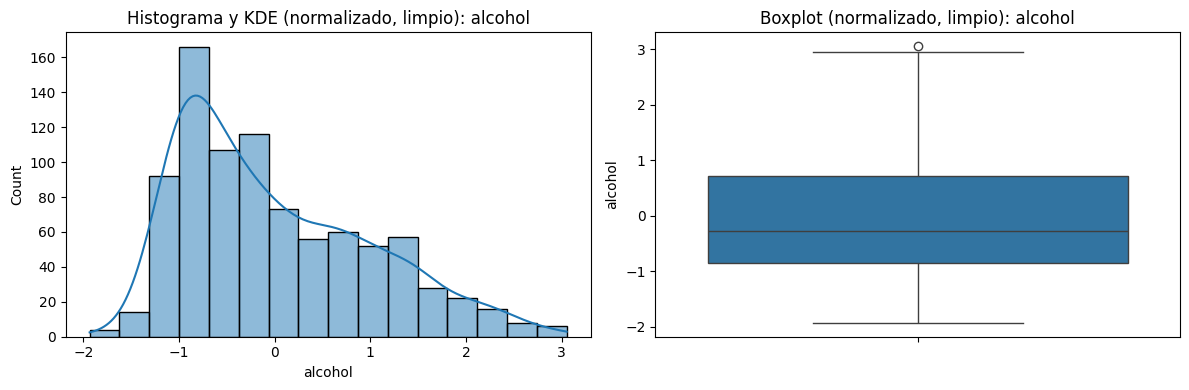

Estadísticos normalizados y limpios de alcohol:
count    8.770000e+02
mean     1.579884e-16
std      1.000571e+00
min     -1.933231e+00
25%     -8.579897e-01
50%     -2.714946e-01
75%      7.059974e-01
max      3.051978e+00
Name: alcohol, dtype: float64
Asimetría: 0.755, Curtosis: -0.287



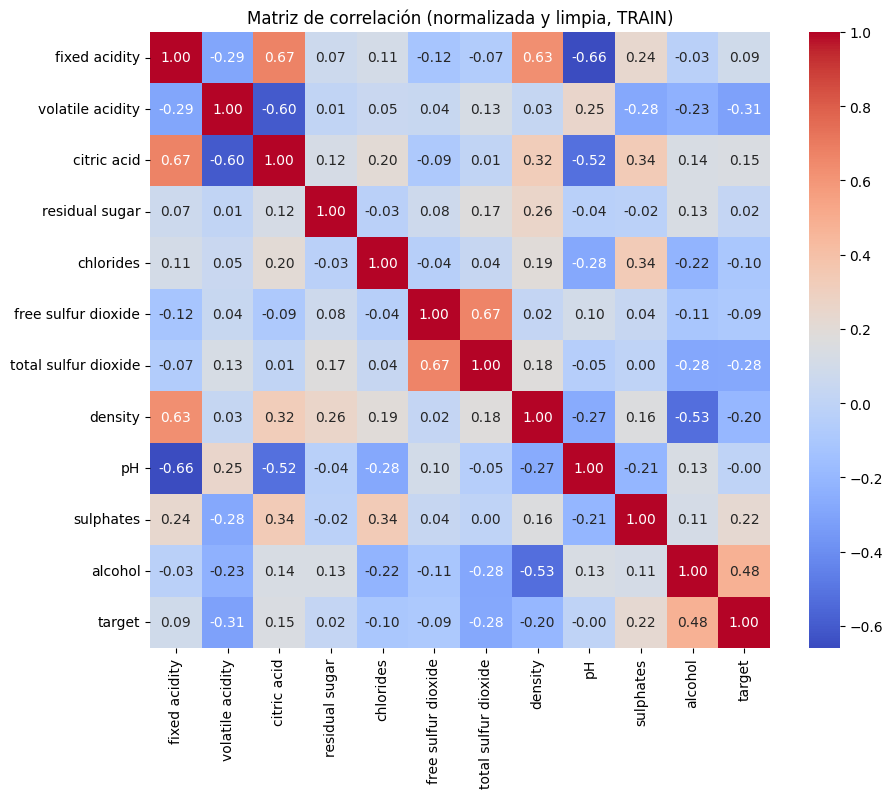

=== Detección de outliers (criterio 1.5*IQR, datos normalizados y limpios) ===
fixed acidity: 10 outliers
volatile acidity: 1 outliers
citric acid: 0 outliers
residual sugar: 64 outliers
chlorides: 56 outliers
free sulfur dioxide: 12 outliers
total sulfur dioxide: 31 outliers
density: 8 outliers
pH: 0 outliers
sulphates: 42 outliers
alcohol: 1 outliers

=== Outliers (datos normalizados y limpios) ===
- fixed acidity: Se detectaron 10 valores atípicos.
- volatile acidity: Se detectaron 1 valores atípicos.
- citric acid: No se detectaron valores atípicos significativos.
- residual sugar: Se detectaron 64 valores atípicos.
- chlorides: Se detectaron 56 valores atípicos.
- free sulfur dioxide: Se detectaron 12 valores atípicos.
- total sulfur dioxide: Se detectaron 31 valores atípicos.
- density: Se detectaron 8 valores atípicos.
- pH: No se detectaron valores atípicos significativos.
- sulphates: Se detectaron 42 valores atípicos.
- alcohol: Se detectaron 1 valores atípicos.


In [124]:
# EDA con datos normalizados y limpios de outliers
num_cols_scaled = [c for c in dftrain_scaled.select_dtypes(include=[np.number]).columns if c not in ['quality', 'target']]

for col in num_cols_scaled:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(dftrain_scaled[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE (normalizado, limpio): {col}")
    sns.boxplot(y=dftrain_scaled[col], ax=axs[1])
    axs[1].set_title(f"Boxplot (normalizado, limpio): {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos normalizados y limpios de {col}:")
    print(dftrain_scaled[col].describe())
    print(f"Asimetría: {dftrain_scaled[col].skew():.3f}, Curtosis: {dftrain_scaled[col].kurtosis():.3f}\n")

# Matriz de correlación y mapa de calor (normalizado y limpio)
corr_scaled = dftrain_scaled[num_cols_scaled + ['target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_scaled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (normalizada y limpia, TRAIN)")
plt.show()


# Identificación de outliers usando el criterio de rango intercuartílico (IQR) en datos normalizados y limpios
print("=== Detección de outliers (criterio 1.5*IQR, datos normalizados y limpios) ===")
outlier_report_norm = {}
for col in num_cols_scaled:
    Q1 = dftrain_scaled[col].quantile(0.25)
    Q3 = dftrain_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dftrain_scaled[(dftrain_scaled[col] < lower) | (dftrain_scaled[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report_norm[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

print("\n=== Outliers (datos normalizados y limpios) ===")
for col, n_outliers in outlier_report_norm.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos.")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")

          Cabe decir que como el analisis de outliers se hace exclusivamente con IQR, se van a seguir detectando outliers aunque ya hayan sido tratados, sobre todo se evidencia más en los que se utiliza winsorizacion, ya que los extremos se encuentran fuera de los rangos intercuartílicos, por lo tanto siguen siendo catalogados como outliers.

# Implementación de Regresión Logística con PyTorch

En esta sección se implementa un modelo de **Regresión Logística** usando PyTorch.
El modelo se entrena con diferentes configuraciones de hiperparámetros 
(learning rate, batch size y epochs) para comparar el rendimiento.

Se mostrarán:
- **Training vs Validation Loss** para cada experimento.
- Métricas: Accuracy, Precision, Recall, F1 y AUC.
- Una **tabla comparativa** con los 10 experimentos.

## Definición del modelo y función de entrenamiento

In [125]:

import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelo de Regresión Logística
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Función de entrenamiento y evaluación

def train_and_evaluate(X_train, y_train, X_val, y_val, input_dim,
                       lr=0.01, batch_size=32, epochs=50, experiment_id=1):
    # Crear modelo
    torch.manual_seed(42)
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values.reshape(-1,1), dtype=torch.float32)
    
    # Crear dataloader
    loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor),
        batch_size=batch_size, shuffle=True
    )
    # Para graficar
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        model.train()
        batch_losses = []
        
        for xb, yb in loader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        
        # Pérdida promedio de entrenamiento
        train_loss = sum(batch_losses) / len(batch_losses)
        train_losses.append(train_loss)
        
        # Pérdida en validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor).item()
        val_losses.append(val_loss)
    
    # Predicciones finales
    with torch.no_grad():
        y_pred = model(X_val_tensor).numpy().ravel()
        y_pred_labels = (y_pred >= 0.5).astype(int)
    
    metrics = {
        "accuracy": accuracy_score(y_val, y_pred_labels),
        "precision": precision_score(y_val, y_pred_labels, zero_division=0),
        "recall": recall_score(y_val, y_pred_labels, zero_division=0),
        "f1": f1_score(y_val, y_pred_labels, zero_division=0),
        "auc": roc_auc_score(y_val, y_pred)
    }
    
    # Gráfico de entrenamiento vs validación
    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title(f"Experimento {experiment_id} (lr={lr}, batch={batch_size}, epochs={epochs})")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    return model, metrics


## Ejecución de los 10 experimentos y evaluacion del modelo


===== Experimento 1 =====


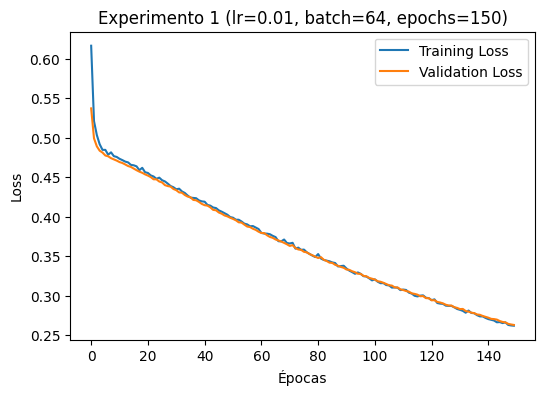


===== Experimento 2 =====


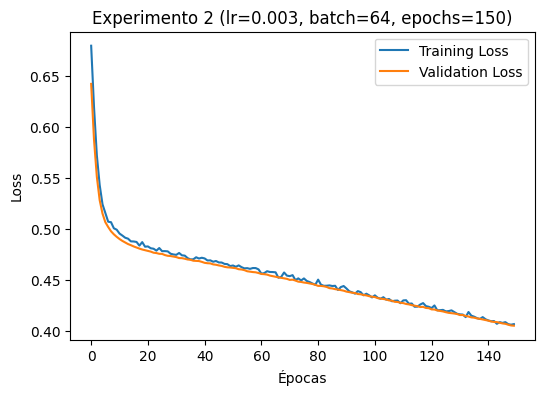


===== Experimento 3 =====


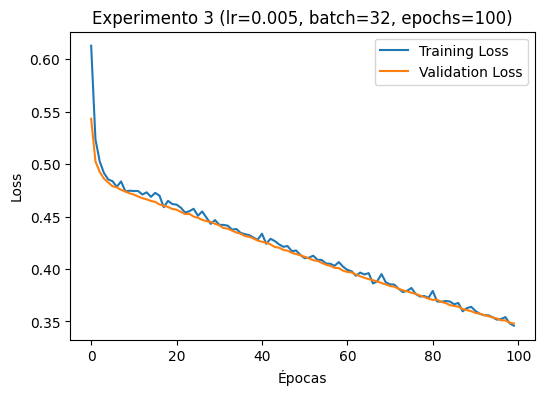


===== Experimento 4 =====


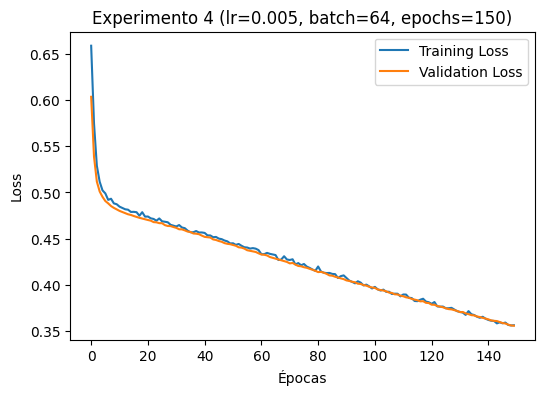


===== Experimento 5 =====


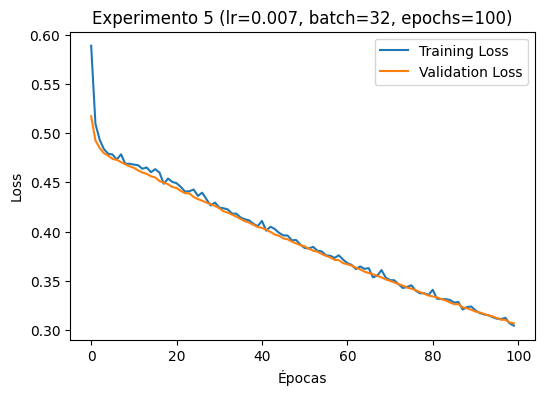


===== Experimento 6 =====


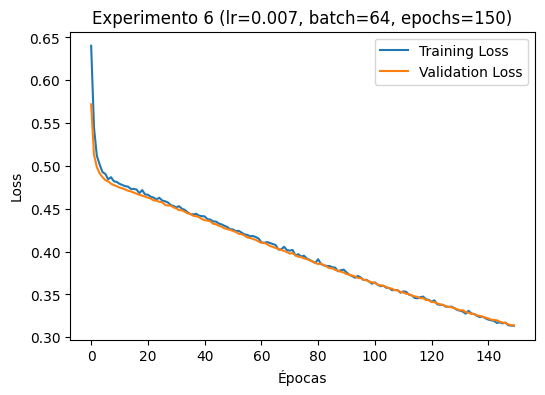


===== Experimento 7 =====


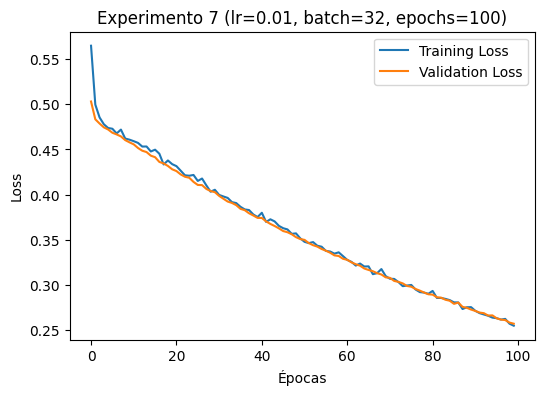


===== Experimento 8 =====


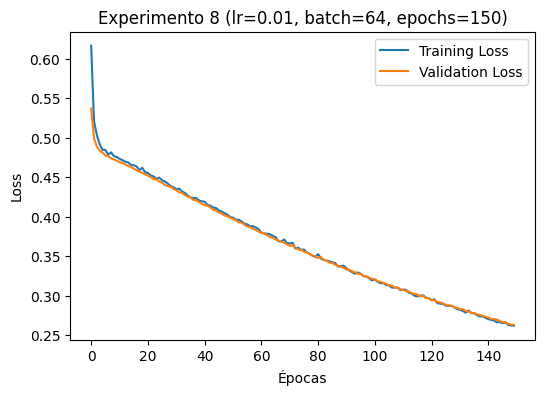


===== Experimento 9 =====


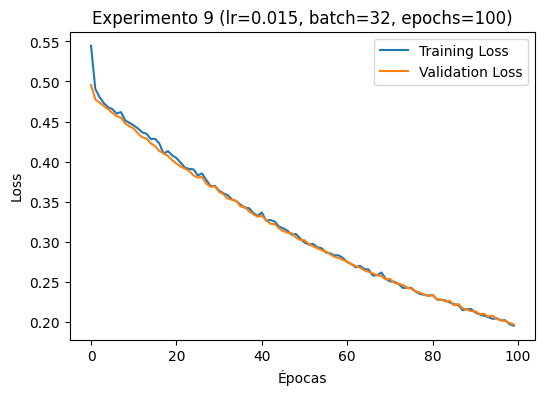


===== Experimento 10 =====


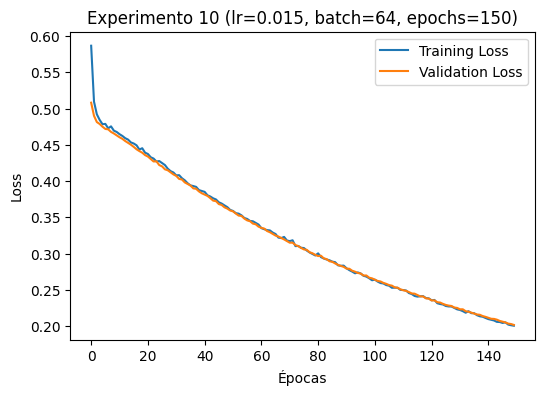

   experiment     lr  batch_size  epochs  accuracy  precision  recall  \
8           9  0.015          32     100  0.968421   0.951923    0.99   
9          10  0.015          64     150  0.957895   0.942308    0.98   
6           7  0.010          32     100  0.947368   0.941176    0.96   
0           1  0.010          64     150  0.942105   0.932039    0.96   
7           8  0.010          64     150  0.942105   0.932039    0.96   
4           5  0.007          32     100  0.915789   0.896226    0.95   
5           6  0.007          64     150  0.905263   0.879630    0.95   
2           3  0.005          32     100  0.878947   0.859813    0.92   
3           4  0.005          64     150  0.878947   0.859813    0.92   
1           2  0.003          64     150  0.842105   0.824074    0.89   

         f1       auc  
8  0.970588  0.997778  
9  0.960784  0.997222  
6  0.950495  0.984111  
0  0.945813  0.981333  
7  0.945813  0.981333  
4  0.922330  0.965667  
5  0.913462  0.963222  
2  0

In [ ]:
# Features seleccionadas basadas en análisis previo
top_features = ['quality', 'alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides']


# Se define input_dim directamente desde dftrain

X_train = dftrain_scaled[top_features]
y_train = dftrain_scaled['target']
X_val   = dfval_scaled[top_features]
y_val   = dfval_scaled['target']
X_test  = dftest_scaled[top_features]
y_test  = dftest_scaled['target']

input_dim = X_train.shape[1]

# ====== 2) Definición de experiments ======
experiments = [
    {"lr": 0.010, "batch_size": 64, "epochs": 150},  
    {"lr": 0.003, "batch_size": 64, "epochs": 150},  
    {"lr": 0.005, "batch_size": 32, "epochs": 100},  
    {"lr": 0.005, "batch_size": 64, "epochs": 150},   
    {"lr": 0.007, "batch_size": 32, "epochs": 100},  
    {"lr": 0.007, "batch_size": 64, "epochs": 150},  
    {"lr": 0.010, "batch_size": 32, "epochs": 100},  
    {"lr": 0.010, "batch_size": 64, "epochs": 150},  
    {"lr": 0.015, "batch_size": 32, "epochs": 100},  
    {"lr": 0.015, "batch_size": 64, "epochs": 150},  
]


results = []
models = []
for i, params in enumerate(experiments, 1):
    print(f"\n===== Experimento {i} =====")
    model, metrics = train_and_evaluate(
        X_train, y_train, X_val, y_val,
        input_dim,
        lr=params["lr"], batch_size=params["batch_size"], epochs=params["epochs"],
        experiment_id=i
    )
    results.append({"experiment": i, **params, **metrics})
    models.append(model)

# Tabla de resultados
df_results = pd.DataFrame(results).sort_values("f1", ascending=False)
print(df_results)


# Analisis de los resultados

Evaluando en TEST el experimento 2 con parámetros: {'lr': 0.003, 'batch_size': 64, 'epochs': 150}


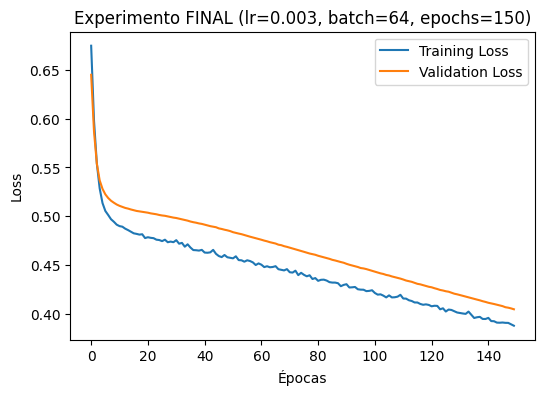

=== Resultados en TEST ===
Accuracy : 0.8163265306122449
Precision: 0.8130841121495327
Recall   : 0.8446601941747572
F1       : 0.8285714285714286
AUC      : 0.9084455579914396


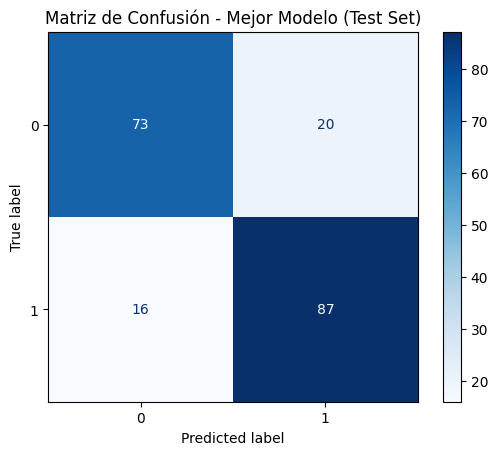

In [127]:


# Seleccionamos el mejor modelo

best_experiment = 2 # superior en metricas 
best_params = experiments[best_experiment - 1]
print(f"Evaluando en TEST el experimento {best_experiment} con parámetros: {best_params}")

#Se definen los 6 features relevantes, de acuerdo a la matriz de correlación y análisis previo
top_features = ['quality', 'alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides']

# Se selecciona los datasets limpios
X_train = dftrain_scaled[top_features]
y_train = dftrain_scaled['target']
X_val   = dfval_scaled[top_features]
y_val   = dfval_scaled['target']
X_test  = dftest_scaled[top_features]
y_test  = dftest_scaled['target']

#Se concatena TRAIN + VAL para reentrenar el modelo final
X_trainval = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
y_trainval = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

input_dim = len(top_features)


# Entrenar con TRAIN+VAL y evaluar en TEST
final_model, _ = train_and_evaluate(
    X_trainval, y_trainval,
    X_test, y_test,
    input_dim=input_dim,
    lr=best_params["lr"],
    batch_size=best_params["batch_size"],
    epochs=best_params["epochs"],
    experiment_id="FINAL", 
)


#Predicciones y métricas en TEST 
with torch.no_grad():
    y_prob_test = final_model(torch.tensor(X_test.values, dtype=torch.float32)).numpy().ravel()
y_hat_test = (y_prob_test >= 0.5).astype(int)

print("=== Resultados en TEST ===")
print("Accuracy :", accuracy_score(y_test, y_hat_test))
print("Precision:", precision_score(y_test, y_hat_test, zero_division=0))
print("Recall   :", recall_score(y_test, y_hat_test, zero_division=0))
print("F1       :", f1_score(y_test, y_hat_test, zero_division=0))
print("AUC      :", roc_auc_score(y_test, y_prob_test))


# Matriz de confusión
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Mejor Modelo (Test Set)")
plt.show()


# Conclusión

El modelo de regresión logística entrenado muestra un desempeño significativamente mejorado en el conjunto de prueba, alcanzando una accuracy de 0.816, precision de 0.813, recall de 0.845, F1-score de 0.829 y un AUC de 0.908. Estos valores reflejan un modelo que no solo clasifica correctamente la mayoría de los vinos buenos, sino que también mantiene un equilibrio adecuado entre la identificación de verdaderos positivos y la minimización de falsos positivos y negativos.

El alto valor de AUC confirma la capacidad del modelo para discriminar eficazmente entre vinos buenos y no buenos. Este rendimiento se debe a un pipeline de preprocesamiento sólido, una selección rigurosa de variables y una definición clara del target, lo que permitió un aprendizaje más robusto y generalizable.